In [1]:
#Description: This program shows how to creat an interactive candlestick chart in Python using Plotly

In [2]:
#Import the libraries
import plotly.graph_objects as go
import pandas as pd

In [5]:
#Load the stock data
#from google.colab import files
#uploaded = files.upload()

In [94]:
import FinanceDataReader as fdr
se = fdr.DataReader('005930','2018-01-01') # 삼성전자

#set the index ex)5/20/2019
#df = df.set_index(pd.DatetimeIndex(df['Date'].values))

se.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919


In [110]:
#Create an interactive candlestick chart
figure = go.Figure(
    data = [
        go.Candlestick(
            x = se.index,
            low = se['Low'],
            high = se['High'],
            close = se['Close'],
            open = se['Open'],
            increasing_line_color = 'blue',
            decreasing_line_color = 'red'
        )
    ]
)
#figure.update_layout(xaxis_rangeslider_visible=False)
figure.update_layout(
    title = 'Samsung Price',
    yaxis_title = 'Samsung Stock Price',
    xaxis_title = 'Date'
)

# Calculate and define moving average of 30 periods
avg_30 = se.Close.rolling(window=30, min_periods=1).mean()

# Calculate and define moving average of 50 periods
avg_50 = se.Close.rolling(window=50, min_periods=1).mean()

trace2 = {
    'x': se.index,
    'y': avg_30,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods'
}

trace3 = {
    'x': se.index,
    'y': avg_50,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
    },
    'name': 'Moving Average of 50 periods'
}

figure.show()

In [ ]:
TA-Lib
flask
pandas
yfinance

In [37]:
#!pip3 install -r requirements.txt 안됨

# https://minjejeon.github.io/learningstock/2018/04/07/installing-and-using-talib.html
# https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib 에서
# 자신의 파이썬 버전과 window bit버전을 맞춰 다운로드 후 인스톨
# !pip3 install TA_Lib-0.4.19-cp38-cp38-win_amd64.whl
import talib

# yahoo finanace
# 주식분할 이력, 배당내역, 애널리스트 평가 총 3가지
# https://junyoru.tistory.com/129
# !pip3 install yfinance
import yfinance as yf

In [69]:
df = yf.download("SPY", start="2017-01-01", end="2020-08-01")

print(data)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03  225.039993  225.830002  223.880005  225.240005  208.213501   
2017-01-04  225.619995  226.750000  225.610001  226.580002  209.452240   
2017-01-05  226.270004  226.580002  225.479996  226.399994  209.285812   
2017-01-06  226.529999  227.750000  225.899994  227.210007  210.034561   
2017-01-09  226.910004  227.070007  226.419998  226.460007  209.341278   
...                ...         ...         ...         ...         ...   
2020-07-27  321.630005  323.410004  320.769989  323.220001  319.518341   
2020-07-28  322.429993  323.640015  320.850006  321.170013  317.491852   
2020-07-29  322.119995  325.730011  322.079987  325.119995  321.396606   
2020-07-30  321.899994  324.410004  319.640015  323.959991  320.249878   
2020-07-31  325.899994  326.630005  321.329

In [ ]:
#talib.CDLMORNINGDOJISTAR(open, high, low, close, penetration=0)
num = talib.CDLMORNINGDOJISTAR(data['Open'], data['Open'], data['Open'], data['Open'])

# Matplotlib으로 봉차트(Candlestick Chart) 그리기

In [42]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

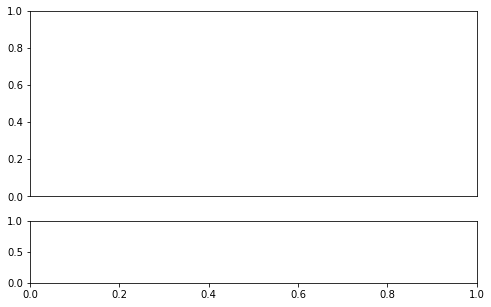

In [82]:
fig = plt.figure(figsize=(8, 5))
fig.set_facecolor('w')

gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
axes = []

axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1], sharex=axes[0]))

axes[0].get_xaxis().set_visible(False) # 첫번째 차트 x축 글자 없애기

In [80]:
# Matplotlib 1.X 버전에서는 matplotlib.finance 모듈에서 candlestick_ohlc() 
# 함수를 제공하고 있었으나 이 모듈은 2.0 버전부터 Deprecated 되었고, 
# 이 모듈은 따로 (Gihub Repository)[https://github.com/matplotlib/mpl_finance]로 
# 유지되고 있습니다. 설치는 다음 명령으로 할 수 있습니다.
#!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

ValueError: unconverted data remains:  00:00:00

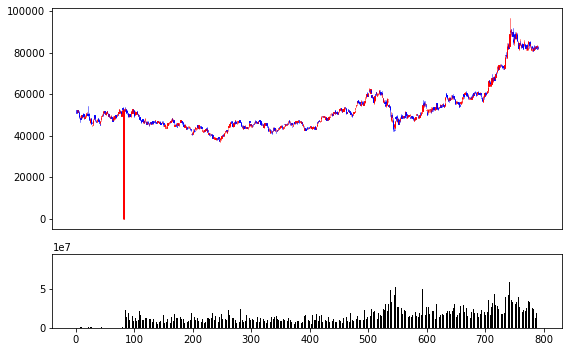

In [106]:
from mpl_finance import candlestick_ohlc
import numpy as np

# ==============================================================
fig = plt.figure(figsize=(8, 5))
fig.set_facecolor('w')

gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
axes = []

axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1], sharex=axes[0]))

axes[0].get_xaxis().set_visible(False) # 첫번째 차트 x축 글자 없애기
# ================================================================

x = np.arange(len(df.index))
ohlc = df[['Open', 'High', 'Low', 'Close']].astype(int).values
dohlc = np.hstack((np.reshape(x, (-1, 1)), ohlc))

# 봉차트
candlestick_ohlc(axes[0], dohlc, width=0.5, colorup='r', colordown='b')

# 거래량 차트
axes[1].bar(x, df.Volume, color='k', width=0.6, align='center')

plt.tight_layout()

# ===============================================================
# xlabels에 요일 추가
import datetime
_xticks = []
_xlabels = []
_wd_prev = 0
for _x, d in zip(x, df.index):
    weekday = datetime.datetime.strptime(str(d), '%Y-%m-%d').weekday()
    if weekday <= _wd_prev:
        _xticks.append(_x)
        _xlabels.append(datetime.datetime.strptime(str(d), '%Y-%m-%d').strftime('%m/%d'))
    _wd_prev = weekday
axes[1].set_xticks(_xticks)
axes[1].set_xticklabels(_xlabels, rotation=45, minor=False)

# ===============================================================
plt.show()

In [108]:
datetime.datetime.strptime(str(df.index[0]), '%Y-%m-%d').weekday()

ValueError: unconverted data remains:  00:00:00

In [115]:
# THIS VERSION IS FOR PYTHON 3 #
import urllib.request, urllib.error, urllib.parse
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
#from matplotlib.finance import candlestick_ohlc
import matplotlib
import pylab
matplotlib.rcParams.update({'font.size': 9})

def rsiFunc(prices, n=14):
    deltas = np.diff(prices)
    seed = deltas[:n+1]
    up = seed[seed>=0].sum()/n
    down = -seed[seed<0].sum()/n
    rs = up/down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100./(1.+rs)

    for i in range(n, len(prices)):
        delta = deltas[i-1] # cause the diff is 1 shorter

        if delta>0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up*(n-1) + upval)/n
        down = (down*(n-1) + downval)/n

        rs = up/down
        rsi[i] = 100. - 100./(1.+rs)

    return rsi

def movingaverage(values,window):
    weigths = np.repeat(1.0, window)/window
    smas = np.convolve(values, weigths, 'valid')
    return smas # as a numpy array


def ExpMovingAverage(values, window):
    weights = np.exp(np.linspace(-1., 0., window))
    weights /= weights.sum()
    a =  np.convolve(values, weights, mode='full')[:len(values)]
    a[:window] = a[window]
    return a


def computeMACD(x, slow=26, fast=12):
    """
    compute the MACD (Moving Average Convergence/Divergence) using a fast and slow exponential moving avg'
    return value is emaslow, emafast, macd which are len(x) arrays
    """
    emaslow = ExpMovingAverage(x, slow)
    emafast = ExpMovingAverage(x, fast)
    return emaslow, emafast, emafast - emaslow


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

def graphData(stock,MA1,MA2):

    '''
        Use this to dynamically pull a stock:
    '''
    try:
        print('Currently Pulling',stock)
        urlToVisit = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
        stockFile =[]
        try:
            sourceCode = urllib.request.urlopen(urlToVisit).read().decode()
            splitSource = sourceCode.split('\n')
            for eachLine in splitSource:
                splitLine = eachLine.split(',')
                if len(splitLine)==6:
                    if 'values' not in eachLine:
                        stockFile.append(eachLine)
        except Exception as e:
            print(str(e), 'failed to organize pulled data.')
    except Exception as e:
        print(str(e), 'failed to pull pricing data')

    try:
        date, closep, highp, lowp, openp, volume = np.loadtxt(stockFile,delimiter=',', unpack=True,
                                                              converters={ 0: bytespdate2num('%Y%m%d')})
        x = 0
        y = len(date)
        newAr = []
        while x < y:
            appendLine = date[x],openp[x],highp[x],lowp[x],closep[x],volume[x]
            newAr.append(appendLine)
            x+=1
            
        Av1 = movingaverage(closep, MA1)
        Av2 = movingaverage(closep, MA2)

        SP = len(date[MA2-1:])
            
        fig = plt.figure(facecolor='#07000d')

        ax1 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4, axisbg='#07000d')
        candlestick_ohlc(ax1, newAr[-SP:], width=.6, colorup='#53c156', colordown='#ff1717')

        Label1 = str(MA1)+' SMA'
        Label2 = str(MA2)+' SMA'

        ax1.plot(date[-SP:],Av1[-SP:],'#e1edf9',label=Label1, linewidth=1.5)
        ax1.plot(date[-SP:],Av2[-SP:],'#4ee6fd',label=Label2, linewidth=1.5)
        
        ax1.grid(True, color='w')
        ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax1.yaxis.label.set_color("w")
        ax1.spines['bottom'].set_color("#5998ff")
        ax1.spines['top'].set_color("#5998ff")
        ax1.spines['left'].set_color("#5998ff")
        ax1.spines['right'].set_color("#5998ff")
        ax1.tick_params(axis='y', colors='w')
        plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(prune='upper'))
        ax1.tick_params(axis='x', colors='w')
        plt.ylabel('Stock price and Volume')

        maLeg = plt.legend(loc=9, ncol=2, prop={'size':7},
                   fancybox=True, borderaxespad=0.)
        maLeg.get_frame().set_alpha(0.4)
        textEd = pylab.gca().get_legend().get_texts()
        pylab.setp(textEd[0:5], color = 'w')

        volumeMin = 0
        
        ax0 = plt.subplot2grid((6,4), (0,0), sharex=ax1, rowspan=1, colspan=4, axisbg='#07000d')
        rsi = rsiFunc(closep)
        rsiCol = '#c1f9f7'
        posCol = '#386d13'
        negCol = '#8f2020'
        
        ax0.plot(date[-SP:], rsi[-SP:], rsiCol, linewidth=1.5)
        ax0.axhline(70, color=negCol)
        ax0.axhline(30, color=posCol)
        ax0.fill_between(date[-SP:], rsi[-SP:], 70, where=(rsi[-SP:]>=70), facecolor=negCol, edgecolor=negCol, alpha=0.5)
        ax0.fill_between(date[-SP:], rsi[-SP:], 30, where=(rsi[-SP:]<=30), facecolor=posCol, edgecolor=posCol, alpha=0.5)
        ax0.set_yticks([30,70])
        ax0.yaxis.label.set_color("w")
        ax0.spines['bottom'].set_color("#5998ff")
        ax0.spines['top'].set_color("#5998ff")
        ax0.spines['left'].set_color("#5998ff")
        ax0.spines['right'].set_color("#5998ff")
        ax0.tick_params(axis='y', colors='w')
        ax0.tick_params(axis='x', colors='w')
        plt.ylabel('RSI')

        ax1v = ax1.twinx()
        ax1v.fill_between(date[-SP:],volumeMin, volume[-SP:], facecolor='#00ffe8', alpha=.4)
        ax1v.axes.yaxis.set_ticklabels([])
        ax1v.grid(False)
        ###Edit this to 3, so it's a bit larger
        ax1v.set_ylim(0, 3*volume.max())
        ax1v.spines['bottom'].set_color("#5998ff")
        ax1v.spines['top'].set_color("#5998ff")
        ax1v.spines['left'].set_color("#5998ff")
        ax1v.spines['right'].set_color("#5998ff")
        ax1v.tick_params(axis='x', colors='w')
        ax1v.tick_params(axis='y', colors='w')
        ax2 = plt.subplot2grid((6,4), (5,0), sharex=ax1, rowspan=1, colspan=4, axisbg='#07000d')
        fillcolor = '#00ffe8'
        nslow = 26
        nfast = 12
        nema = 9
        emaslow, emafast, macd = computeMACD(closep)
        ema9 = ExpMovingAverage(macd, nema)
        ax2.plot(date[-SP:], macd[-SP:], color='#4ee6fd', lw=2)
        ax2.plot(date[-SP:], ema9[-SP:], color='#e1edf9', lw=1)
        ax2.fill_between(date[-SP:], macd[-SP:]-ema9[-SP:], 0, alpha=0.5, facecolor=fillcolor, edgecolor=fillcolor)

        plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(prune='upper'))
        ax2.spines['bottom'].set_color("#5998ff")
        ax2.spines['top'].set_color("#5998ff")
        ax2.spines['left'].set_color("#5998ff")
        ax2.spines['right'].set_color("#5998ff")
        ax2.tick_params(axis='x', colors='w')
        ax2.tick_params(axis='y', colors='w')
        plt.ylabel('MACD', color='w')
        ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='upper'))
        for label in ax2.xaxis.get_ticklabels():
            label.set_rotation(45)

        plt.suptitle(stock.upper(),color='w')
        plt.setp(ax0.get_xticklabels(), visible=False)
        plt.setp(ax1.get_xticklabels(), visible=False)
        
        ax1.annotate('Big news!',(date[510],Av1[510]),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='white', shrink=0.05),
            fontsize=14, color = 'w',
            horizontalalignment='right', verticalalignment='bottom')

        plt.subplots_adjust(left=.09, bottom=.14, right=.94, top=.95, wspace=.20, hspace=0)
        plt.show()
        fig.savefig('example.png',facecolor=fig.get_facecolor())
           
    except Exception as e:
        print('main loop',str(e))

while True:
    stock = input('Stock to plot: ')
    graphData(stock,10,50)


Stock to plot: SA
Currently Pulling SA
<urlopen error [Errno 11001] getaddrinfo failed> failed to organize pulled data.
main loop module 'matplotlib.dates' has no attribute 'strpdate2num'
Stock to plot: SAMSUNG
Currently Pulling SAMSUNG
<urlopen error [Errno 11001] getaddrinfo failed> failed to organize pulled data.
main loop module 'matplotlib.dates' has no attribute 'strpdate2num'
Stock to plot: SSPL
Currently Pulling SSPL
<urlopen error [Errno 11001] getaddrinfo failed> failed to organize pulled data.
main loop module 'matplotlib.dates' has no attribute 'strpdate2num'


KeyboardInterrupt: Interrupted by user